#### NICE
- The **NICE** (Non-linear Independent Component Estimation; Dinh, et al. 2015) model is a predecessor of RealNVP. The transformation in NICE is the affine coupling layer without the scale term, known as additive coupling layer.
$$
\begin{cases}
\mathbf{y}_{1:d} &= \mathbf{x}_{1:d} \\ 
\mathbf{y}_{d+1:D} &= \mathbf{x}_{d+1:D} + m(\mathbf{x}_{1:d})
\end{cases}
\Leftrightarrow 
\begin{cases}
\mathbf{x}_{1:d} &= \mathbf{y}_{1:d} \\ 
\mathbf{x}_{d+1:D} &= \mathbf{y}_{d+1:D} - m(\mathbf{y}_{1:d})
\end{cases}
$$

-----------------------
#### RealNVP (Real-valued Non-Volume Preserving)

> <p>The <strong>RealNVP</strong>(Dinh et al., 2017) model implements a normalizing flow by stacking a sequence of invertible bijective transformation functions. In each bijection <script type="math/tex">f: \mathbf{x} \mapsto \mathbf{y}</script>, known as <em>affine coupling layer</em>,  the input dimensions are split into two parts:</p>
><ul>
  <li>The first $d$ dimensions stay same;</li>
  <li>The second part, $d+1$ to $D$ dimensions, undergo an affine transformation and both the scale and shift parameters are functions of the first $d$ dimensions.</li>
</ul>

>$$
\begin{aligned}
\mathbf{y}_{1:d} &= \mathbf{x}_{1:d} \\ 
\mathbf{y}_{d+1:D} &= \mathbf{x}_{d+1:D} \odot \exp({s(\mathbf{x}_{1:d})}) + t(\mathbf{x}_{1:d})
\end{aligned}
$$
><p>where $s(.)$ and $t(.)$ are <em>scale</em> and <em>translation</em> functions and both map $\mathbb{R}^d \mapsto \mathbb{R}^{D-d}$. The $\odot$ operation is the element-wise product.</p>

*bijective: one-to-one correspondence (일대일 대응)

><p>Now let’s check whether this transformation satisfy two basic properties  for a flow transformation.</p>
><p><strong>Condition 1</strong>: “It is easily invertible.”</p>
><p>Yes and it is fairly straightforward.</p>
>$$
\begin{cases}
\mathbf{y}_{1:d} &= \mathbf{x}_{1:d} \\ 
\mathbf{y}_{d+1:D} &= \mathbf{x}_{d+1:D} \odot \exp({s(\mathbf{x}_{1:d})}) + t(\mathbf{x}_{1:d})
\end{cases}
\Leftrightarrow 
\begin{cases}
\mathbf{x}_{1:d} &= \mathbf{y}_{1:d} \\ 
\mathbf{x}_{d+1:D} &= (\mathbf{y}_{d+1:D} - t(\mathbf{y}_{1:d})) \odot \exp(-s(\mathbf{y}_{1:d}))
\end{cases} $$

><p><strong>Condition 2</strong>: “Its Jacobian determinant is easy to compute.”</p>
><p>Yes. It is not hard to get the Jacobian matrix and determinant of this transformation. The Jacobian is a lower triangular matrix.</p>
>$$
\mathbf{J} = 
\begin{bmatrix}
  \mathbb{I}_d & \mathbf{0}_{d\times(D-d)} \\[5pt]
  \frac{\partial \mathbf{y}_{d+1:D}}{\partial \mathbf{x}_{1:d}} & \text{diag}(\exp(s(\mathbf{x}_{1:d})))
\end{bmatrix} $$
><p>Hence the determinant is simply the product of terms on the diagonal.</p>
>$$
\det(\mathbf{J}) 
= \prod_{j=1}^{D-d}\exp(s(\mathbf{x}_{1:d}))_j
= \exp(\sum_{j=1}^{D-d} s(\mathbf{x}_{1:d})_j)$$

><p>So far, the affine coupling layer looks perfect for constructing a normalizing flow.
Computing the Jacobian determinant does not involve computing the Jacobian of $s$ or $t$, those functions can be arbitrarily complex; i.e. both $s$ and $t$ can be modeled by deep neural networks.</p>


#### The issue of affine coupling layer
- In one affine coupling layer, some dimensions (channels) remain unchanged. To make sure all the inputs have a chance to be altered, the model reverses the ordering in each layer so that different components are left unchanged. Following such an alternating pattern, the set of units which remain identical in one transformation layer are always modified in the next.

----------------------
#### Glow

- The **Glow** (Kingma and Dhariwal, 2018) model extends the previous reversible generative models, NICE and RealNVP, and simplifies the architecture by replacing the reverse permutation operation on the channel ordering with invertible 1x1 convolutions.

<img src=attachment:image.png width=350><br>
<center>Fig. One step of flow in the Glow model *<a href="https://arxiv.org/abs/1807.03039">source</a></center>
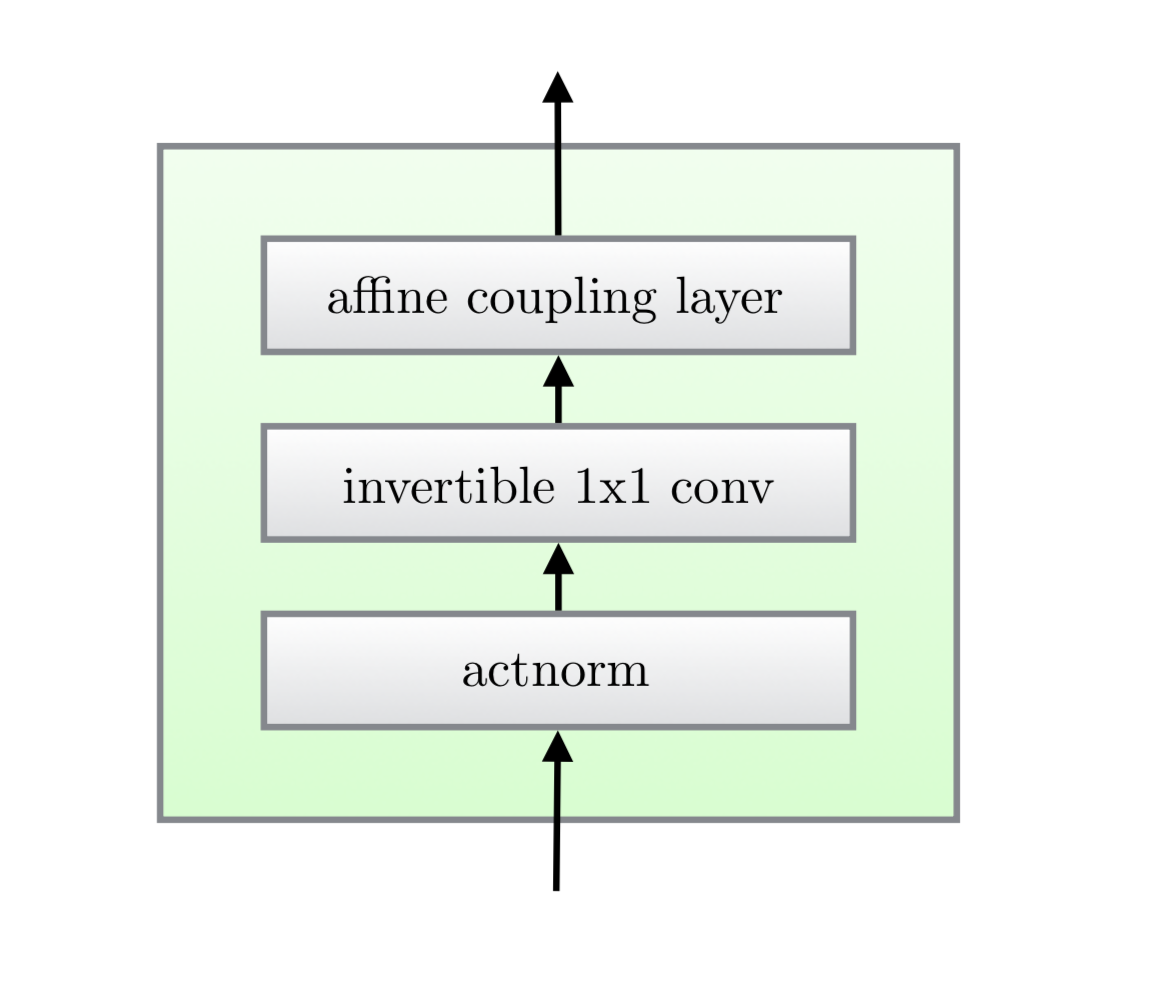

- A 1×1 convolution with equal number of input and output channels is a generalization of any permutation of the channel ordering.

<img src=attachment:image.png width=500>
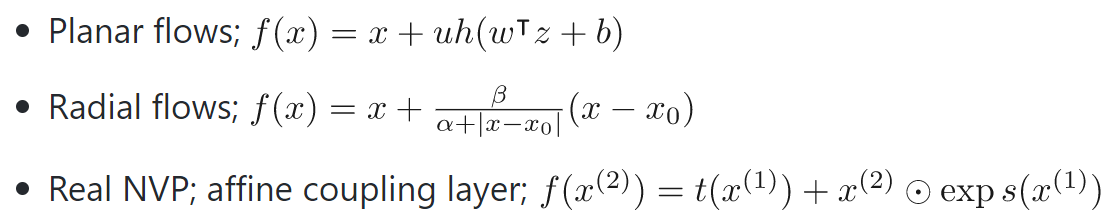